In [ ]:
!pip install -q pdfplumber sentence-transformers openpyxl




In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload PDF files manually here




Saving yogeswar_reddy (30).pdf to yogeswar_reddy (30).pdf


In [ ]:
import os
import pdfplumber
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
resume_texts = []
resume_names = []

In [ ]:
def extract_text_from_pdf(file_path):
      text = ""
      try:
          with pdfplumber.open(file_path) as pdf:
              for page in pdf.pages:
                  page_text = page.extract_text()
                  if page_text:
                     text += page_text + "\n"
          return text.strip()
      except Exception as e:
           print(f"Error reading {file_path}: {e}")
      return ""


In [ ]:
for file_name in uploaded.keys():
    text = extract_text_from_pdf(file_name)
    if text:
       resume_texts.append(text)
       resume_names.append(file_name)
    else:
       print(f"⚠️ Skipped unreadable or empty file: {file_name}")

In [ ]:
if not resume_texts:
      raise ValueError("❌ No valid resume content found. Please upload text-based PDFs.")

In [ ]:
job_description = """
We are hiring a Data Analyst with experience in Python, SQL, Power BI, and strong communication skills.
The ideal candidate should be able to build dashboards, perform data cleaning, and extract actionable insights.
"""

In [ ]:
all_texts = [job_description] + resume_texts
embeddings = model.encode(all_texts)

job_vec = embeddings[0]
resume_vecs = embeddings[1:]



In [ ]:
similarities = cosine_similarity([job_vec], resume_vecs)[0]

In [ ]:
# 📊 Step 7: Score and visualize
df_results = pd.DataFrame({
    'Resume Name': resume_names,
        'Similarity Score (%)': np.round(similarities * 100, 2)
        })
df_results = df_results.sort_values(by='Similarity Score (%)', ascending=False).reset_index(drop=True)


In [ ]:
df_results.to_excel("resume_match_results.xlsx", index=False)


In [ ]:
files.download("resume_match_results.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

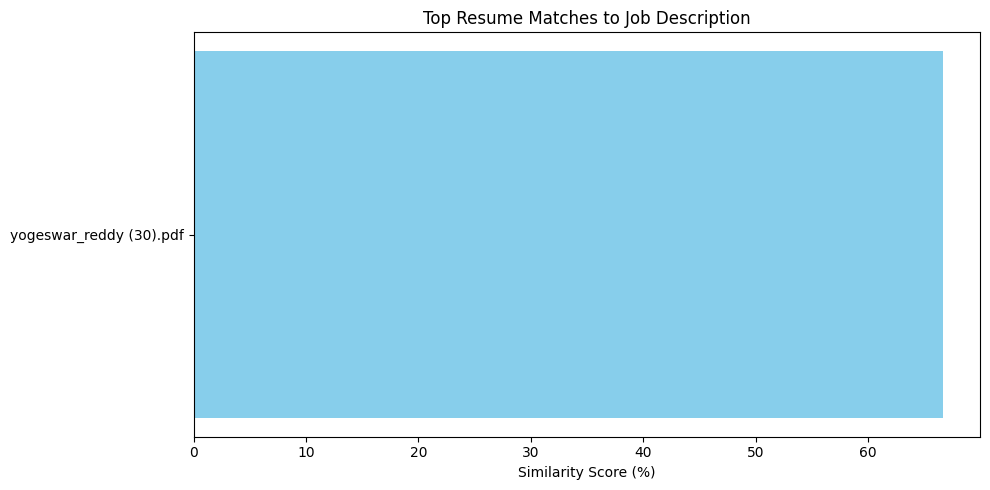

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(df_results['Resume Name'], df_results['Similarity Score (%)'], color='skyblue')
plt.xlabel("Similarity Score (%)")
plt.title("Top Resume Matches to Job Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
print("Top Matching Resumes:")
print(df_results.head())

Top Matching Resumes:
               Resume Name  Similarity Score (%)
0  yogeswar_reddy (30).pdf             66.620003
